# Table of Contents

01. Importing Libraries
02. Importing Data (full_merge)
03. Addressing PII 
04. Creating a Regional Variable
05. Low Activity Customers
06. Profiling (Age, Income, Marital, Dependents, Department)
07. Additional Visualizations
    (07.1 Price Range Distribution
    07.2 Brand Loyalty Chart
    07.3 Ordering Habits Based on Loyalty Status
    07.4 Ordering Habits of Age Groups
    07.5 Ordering Habits by Dependents
    07.6 Ordering Habits by Income)

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Define path 
path = r'C:\Users\legra\Desktop\06-2022 Instacart Basket Analysis'

In [3]:
df_full_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'full_merge.pkl'))

In [4]:
#Checking outputs

df_full_merge.shape

(32404859, 33)

In [5]:
df_full_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 03. Addressing PII

Personally identifiable information PII is included in the data, first and last names. They will be removed as it is not important to the analysis.

In [6]:
#dropping columns

df_full_merge = df_full_merge.drop(columns = ['first_name', 'last_name'])

In [7]:
#checking dropped columns

df_full_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,new_customer,product_id,add_to_cart_order,reordered,...,spender_flag,order_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


Crosstabs in Python

In [8]:
crosstab = pd.crosstab(df_full_merge['days_since_previous_order'], df_full_merge['order_number'], dropna = False)

In [9]:
crosstab.to_clipboard()

## 04. Creating a Regional variable

The Instacart officers are interested in comparing customer behavior in different geographic areas.

In [10]:
#define function

result = []

for value in df_full_merge['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi','Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    else:
        result.append('West')

In [11]:
#Creating new column

df_full_merge['region'] = result

In [12]:
df_full_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
#creating crosstab to check spending across regions

crosstab2 = pd.crosstab(df_full_merge['region'], df_full_merge['spender_flag'], dropna = False)

In [14]:
crosstab2

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


The spending across the regions are similar in nature.

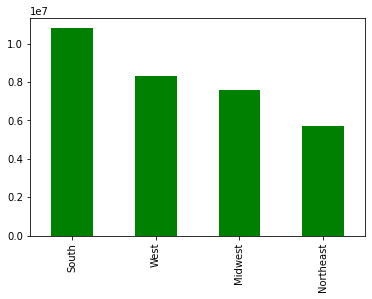

In [15]:
#creat bar chart

region = df_full_merge['region'].value_counts().plot.bar(color = 'green')

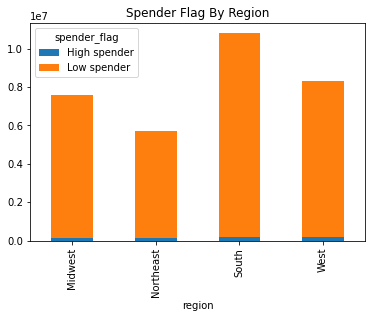

In [16]:
#create stacked bar
crosstab2_bar = crosstab2.plot(kind = 'bar', stacked = True, title = 'Spender Flag By Region')

In [17]:
#saving viz
region.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_bar.png'))
crosstab2_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_spender_bar.png'))

## 05. Low activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

This dataframe will be used for analysis moving forward.

In [18]:
#checking column names
df_full_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spent', 'spender_flag', 'order_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region'],
      dtype='object')

In [19]:
#creating flags

df_full_merge.loc[df_full_merge['max_order'] < 5, 'activity_flag'] = 'Low activity customer'
df_full_merge.loc[df_full_merge['max_order'] >= 5, 'activity_flag'] = 'Normal activity customer'

In [20]:
#checking output

df_full_merge['activity_flag'].value_counts(dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: activity_flag, dtype: int64

In [21]:
#creating subset

df = df_full_merge[df_full_merge['activity_flag'] =='Normal activity customer']

In [22]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal activity customer


In [23]:
#export df

df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'normal_activity_cust.pkl'))

## 06. Profiling

### Age

In [25]:
#creating age group flags

df.loc[df['age'] <= 24, 'age_group'] = 'Young adult'
df.loc[(df['age'] > 24) & (df['age'] < 65), 'age_group'] = 'Adult'
df.loc[df['age'] >= 65, 'age_group'] = 'Senior'

In [26]:
df['age_group'].value_counts()

Adult          19353826
Senior          8195544
Young adult     3415194
Name: age_group, dtype: int64

In [27]:
#aggregating prices by age group
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789062  1.0  25.0
Senior       7.796875  1.0  25.0
Young adult  7.789062  1.0  25.0

In [28]:
#aggregating order frequency by age group
df.groupby('age_group').agg({'days_since_previous_order':['mean', 'min', 'max']})

days_since_previous_order           
                                 mean  min   max
age_group                                       
Adult                       10.828125  0.0  30.0
Senior                      10.789062  0.0  30.0
Young adult                 10.765625  0.0  30.0

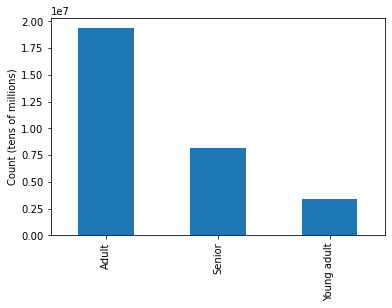

In [30]:
#create bar chart
age_bar = df['age_group'].value_counts().plot.bar(ylabel = 'Count (tens of millions)')

In [31]:
#save viz
age_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_group.png'))

### Income

In [33]:
#creating income flags

#Low income 0-52200
df.loc[df['income'] <= 52200, 'income_flag'] = 'Low income'
#Middle income 52201-156600
df.loc[(df['income'] > 52200) & (df['income'] <= 156600 ), 'income_flag'] = 'Middle income'
#Upper income 156601 and up
df.loc[df['income'] > 156600, 'income_flag'] = 'Upper income'

In [34]:
df['income_flag'].value_counts()

Middle income    24540648
Low income        3692453
Upper income      2731463
Name: income_flag, dtype: int64

In [35]:
#aggregating expenditures by income flag
df.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                   mean  min   max
income_flag                       
Low income     6.765625  1.0  25.0
Middle income  7.929688  1.0  25.0
Upper income   7.937500  1.0  25.0

In [36]:
#aggregating order frequency by income flag
df.groupby('income_flag').agg({'days_since_previous_order':['mean', 'min', 'max']})

days_since_previous_order           
                                   mean  min   max
income_flag                                       
Low income                    11.148438  0.0  30.0
Middle income                 10.773438  0.0  30.0
Upper income                  10.664062  0.0  30.0

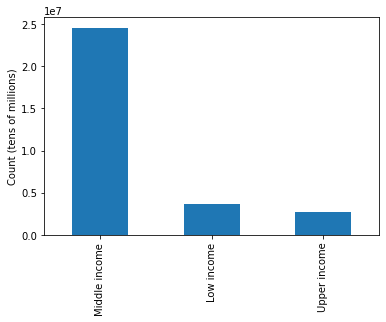

In [37]:
#create bar chart
income_bar = df['income_flag'].value_counts().plot.bar(ylabel = 'Count (tens of millions)')

In [38]:
#save viz
income_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income_group.png'))

### Marital Status

In [39]:
#aggregating expenditures by marital status
df.groupby('marital_status').agg({'prices':['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.800781  1.0  25.0
living with parents and siblings  7.800781  1.0  25.0
married                           7.789062  1.0  25.0
single                            7.785156  1.0  25.0

In [40]:
#aggregating order frequency by marital status
df.groupby('marital_status').agg({'days_since_previous_order':['mean', 'min', 'max']})

days_since_previous_order           
                                                      mean  min   max
marital_status                                                       
divorced/widowed                                 10.750000  0.0  30.0
living with parents and siblings                 10.750000  0.0  30.0
married                                          10.820312  0.0  30.0
single                                           10.812500  0.0  30.0

In [41]:
df['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

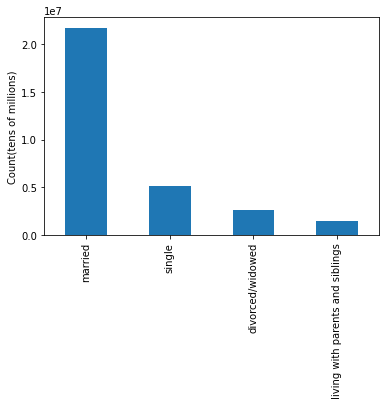

In [43]:
#create bar chart
marital_bar = df['marital_status'].value_counts().plot.bar(ylabel = 'Count(tens of millions)')

In [44]:
#save viz
marital_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_marital.png'))

### Dependents

In [46]:
#create flag for dependents

df.loc[df['number_of_dependants'] == 0, 'dependent_flag'] = 'No dependents'
df.loc[df['number_of_dependants'] == 1, 'dependent_flag'] = 'One dependent'
df.loc[df['number_of_dependants'] > 1, 'dependent_flag'] = 'Multiple dependents'

In [47]:
df['dependent_flag'].value_counts()

Multiple dependents    15505777
No dependents           7739681
One dependent           7719106
Name: dependent_flag, dtype: int64

In [48]:
#aggregating expenditures by dependent flag
df.groupby('dependent_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                         mean  min   max
dependent_flag                          
Multiple dependents  7.789062  1.0  25.0
No dependents        7.789062  1.0  25.0
One dependent        7.796875  1.0  25.0

In [49]:
#aggregating order frequency by dependent flag
df.groupby('dependent_flag').agg({'days_since_previous_order':['mean', 'min', 'max']})

days_since_previous_order           
                                         mean  min   max
dependent_flag                                          
Multiple dependents                 10.820312  0.0  30.0
No dependents                       10.789062  0.0  30.0
One dependent                       10.804688  0.0  30.0

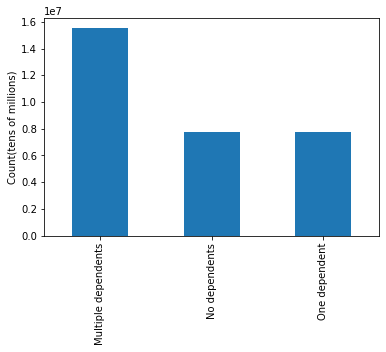

In [50]:
#create bar chart
dependent_bar = df['dependent_flag'].value_counts().plot.bar(ylabel = 'Count(tens of millions)')

In [51]:
#save viz
dependent_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dependent.png'))

### Department

In [52]:
#create department profile

dept_profile = []

for value in df['department_id']:
    if value == 1:
        dept_profile.append('Frozen')
    elif value == 2:
        dept_profile.append('Other')
    elif value == 3:
        dept_profile.append('Bakery')
    elif value == 4:
        dept_profile.append('Produce')
    elif value == 5:
        dept_profile.append('Alcohol')
    elif value == 6:
        dept_profile.append('International')
    elif value == 7:
        dept_profile.append('Beverages')
    elif value == 8:
        dept_profile.append('Pets')
    elif value == 9:
        dept_profile.append('Dry goods pasta')
    elif value == 10:
        dept_profile.append('Bulk')
    elif value == 11:
        dept_profile.append('Personal care')
    elif value == 12:
        dept_profile.append('Meat seafood')
    elif value == 13:
        dept_profile.append('Pantry')
    elif value == 14:
        dept_profile.append('Breakfast')
    elif value == 15:
        dept_profile.append('Canned goods')
    elif value == 16:
        dept_profile.append('Dairy eggs')
    elif value == 17:
        dept_profile.append('Household')
    elif value == 18:
        dept_profile.append('Babies')
    elif value == 19:
        dept_profile.append('Snacks')
    elif value == 20:
        dept_profile.append('Deli')
    elif value == 21:
        dept_profile.append('Missing')

In [54]:
#create new column
df['dept_name'] = dept_profile

C:\Users\legra\AppData\Local\Temp\ipykernel_9252\431269346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dept_name'] = dept_profile


In [55]:
#checking output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependants,marital_status,income,region,activity_flag,age_group,income_flag,dependent_flag,dept_name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,Normal activity customer,Adult,Low income,Multiple dependents,Beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,South,Normal activity customer,Adult,Low income,Multiple dependents,Beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,South,Normal activity customer,Adult,Low income,Multiple dependents,Beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,South,Normal activity customer,Adult,Low income,Multiple dependents,Beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,South,Normal activity customer,Adult,Low income,Multiple dependents,Beverages


In [56]:
#checking frequency
df['dept_name'].value_counts()

Produce            9079273
Dairy eggs         5177182
Snacks             2766406
Beverages          2571901
Frozen             2121731
Pantry             1782705
Bakery             1120828
Canned goods       1012074
Deli               1003834
Dry goods pasta     822136
Household           699857
Meat seafood        674781
Breakfast           670850
Personal care       424306
Babies              410392
International       255991
Alcohol             144627
Pets                 93060
Missing              64768
Other                34411
Bulk                 33451
Name: dept_name, dtype: int64

In [57]:
#aggregating expenditures by dept_name
df.groupby('dept_name').agg({'prices':['mean', 'min', 'max']})

prices                     
                      mean       min        max
dept_name                                      
Alcohol           8.148438  1.000000  15.000000
Babies            7.632812  1.000000  15.000000
Bakery            7.855469  1.000000  15.000000
Beverages         7.683594  1.000000  15.000000
Breakfast         8.031250  1.000000  14.898438
Bulk              8.343750  1.400391  14.101562
Canned goods      7.546875  1.000000  15.000000
Dairy eggs        8.335938  1.000000  15.000000
Deli              7.781250  1.000000  15.000000
Dry goods pasta   7.347656  1.000000  15.000000
Frozen            7.734375  1.000000  15.000000
Household         7.378906  1.000000  15.000000
International     7.679688  1.000000  15.000000
Meat seafood     16.296875  8.000000  25.000000
Missing           8.664062  1.000000  15.000000
Other             6.960938  1.099609  15.000000
Pantry            8.015625  1.000000  20.000000
Personal care     8.000000  1.000000  15.000000
Pets              7.886719  1.000000  15.000000
Produce           7.980469  1.000000  15.000000
Snacks            4.277344  1.599609   7.000000

In [58]:
#aggregating order frequency by dept_name
df.groupby('dept_name').agg({'days_since_previous_order':['mean', 'min', 'max']})

days_since_previous_order           
                                     mean  min   max
dept_name                                           
Alcohol                         10.007812  0.0  30.0
Babies                           9.781250  0.0  30.0
Bakery                          10.804688  0.0  30.0
Beverages                       10.765625  0.0  30.0
Breakfast                       11.000000  0.0  30.0
Bulk                             9.882812  0.0  30.0
Canned goods                    11.320312  0.0  30.0
Dairy eggs                      10.710938  0.0  30.0
Deli                            11.054688  0.0  30.0
Dry goods pasta                 11.437500  0.0  30.0
Frozen                          11.414062  0.0  30.0
Household                       11.648438  0.0  30.0
International                   10.960938  0.0  30.0
Meat seafood                    11.125000  0.0  30.0
Missing                          9.867188  0.0  30.0
Other                           10.625000  0.0  30.0
Pantry                          10.835938  0.0  30.0
Personal care                   11.257812  0.0  30.0
Pets                            11.593750  0.0  30.0
Produce                         10.570312  0.0  30.0
Snacks                          10.671875  0.0  30.0

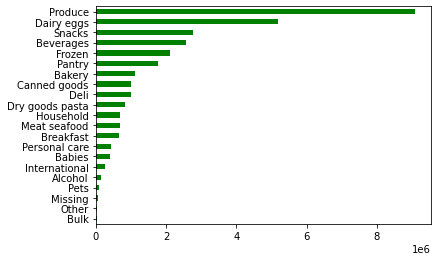

In [59]:
#bar chart for dept frequency
dept_bar=df['dept_name'].value_counts().sort_values().plot.barh(color = 'green')

In [60]:
#saving viz
dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dept_bar.png'))

## 07. Additonal Visualizations

### 07.1 Price Range Distribution

In [61]:
#price range value counts
df['price_range_loc'].value_counts()

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

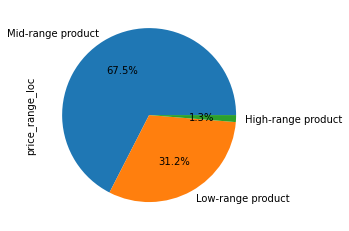

In [62]:
#creating pie chart
price_range_pie = df['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%')

In [63]:
#saving viz
price_range_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_range_pie.png'))

### 07.2 Brand Loyalty Chart

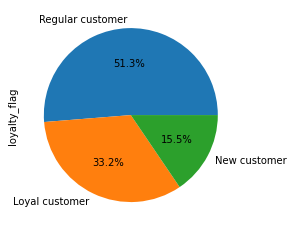

In [99]:
#creating bar chart
brand_loyalty_pie = df['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')

In [100]:
#saving viz
brand_loyalty_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'brand_loyalty_pie.png'))

### 07.3 Ordering Habits based on loyalty status

In [66]:
#create crosstab for products by loyalty flag
crosstab3 = pd.crosstab(df['dept_name'], df['loyalty_flag'], dropna = False)

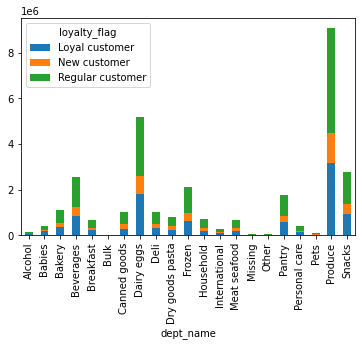

In [68]:
crosstab3_bar = crosstab3.plot(kind = 'bar', stacked = True)

In [70]:
#create crosstab for spender flag by loyalty flag
crosstab4 = pd.crosstab(df['spender_flag'], df['loyalty_flag'], dropna = False)

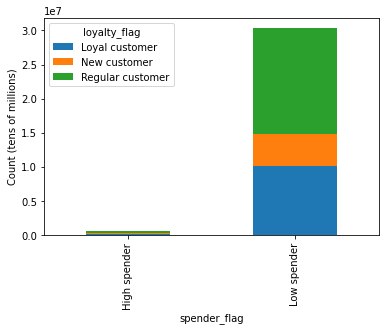

In [71]:
#create stacked bar
crosstab4_bar = crosstab4.plot(kind = 'bar', stacked = True, ylabel = 'Count (tens of millions)')

In [73]:
crosstab4.to_clipboard()

In [77]:
#create crosstab for price_range_loc by loyalty flag
crosstab6 = pd.crosstab(df['price_range_loc'], df['loyalty_flag'], dropna = False)

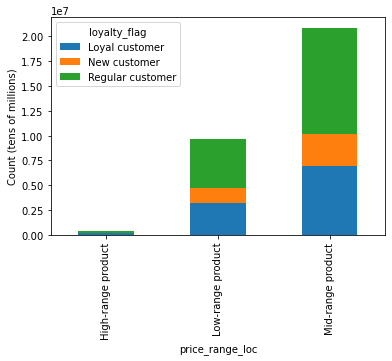

In [79]:
#create bar chart
crosstab6_bar = crosstab6.plot(kind = 'bar', stacked = True, ylabel = 'Count (tens of millions)')

In [81]:
crosstab6.to_clipboard()

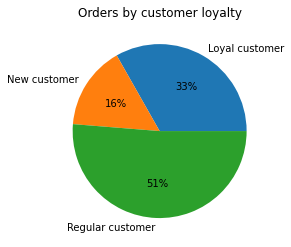

In [92]:
#pie chart orders by loyalty flag
data = df['loyalty_flag'].value_counts().sort_index()
loyalty_orders_pie = data.plot.pie(autopct=('%1.0f%%'), ylabel = ' ', title='Orders by customer loyalty')

In [94]:
#saving viz
crosstab3_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'habits_loyalty_bar.png'))
crosstab4_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'spender_loyalty_bar.png'))
crosstab6_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_loyalty_bar.png'))
loyalty_orders_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_orders_pie.png'))

### 07.4 Ordering Habits of Age Groups

In [74]:
#create crosstab for products by age group
crosstab5 = pd.crosstab(df['dept_name'], df['age_group'], dropna = False)

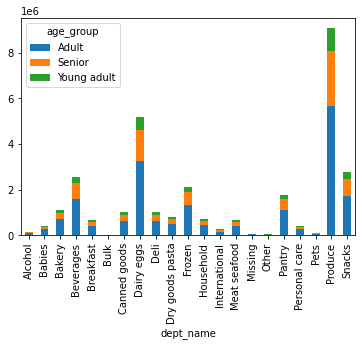

In [75]:
crosstab5_bar = crosstab5.plot(kind = 'bar', stacked = True)

In [96]:
#create crosstab for order frequency by age_group
crosstab7 = pd.crosstab(df['age_group'], df['frequency_flag'], dropna = False)

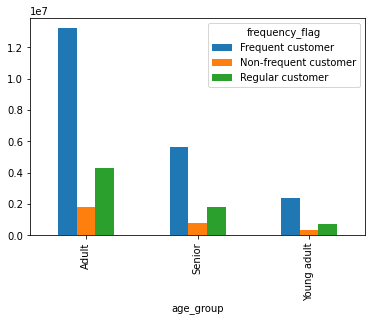

In [98]:
crosstab7_bar = crosstab7.plot(kind = 'bar', stacked = False)

In [103]:
#create crosstab for spending by age group
crosstab8 = pd.crosstab(df['age_group'], df['spender_flag'], dropna = False)

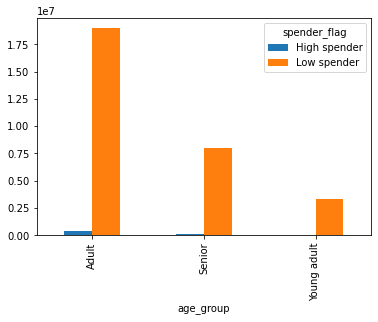

In [104]:
crosstab8_bar = crosstab8.plot(kind = 'bar', stacked = False)

In [106]:
#save viz
crosstab5_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_v_dept.png'))
crosstab7_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_v_freq.png'))
crosstab8_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_v_spend.png'))

### 07.5 Ordering Habits by Dependents

In [107]:
#create crosstab for products dependent_flag
crosstab9 = pd.crosstab(df['dept_name'], df['dependent_flag'], dropna = False)

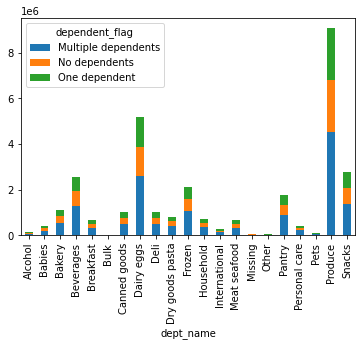

In [108]:
crosstab9_bar = crosstab9.plot(kind= 'bar', stacked = True)

In [109]:
#create crosstab for order frequency by dependent_flag
crosstab10 = pd.crosstab(df['dependent_flag'], df['frequency_flag'], dropna = False)

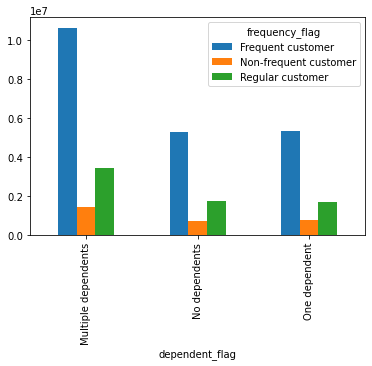

In [110]:
crosstab10_bar = crosstab10.plot(kind = 'bar', stacked = False)

In [111]:
#create crosstab for spending by dependent_flag
crosstab11 = pd.crosstab(df['dependent_flag'], df['spender_flag'], dropna = False)

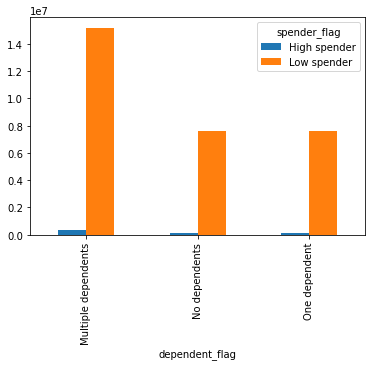

In [112]:
crosstab11_bar = crosstab11.plot(kind = 'bar', stacked = False)

In [113]:
#save viz
crosstab9_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_v_dept.png'))
crosstab10_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_v_freq.png'))
crosstab11_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dep_v_spend.png'))

### 07.6 Ordering Habits by Income

In [114]:
#create crosstab for products income_flag
crosstab12 = pd.crosstab(df['dept_name'], df['income_flag'], dropna = False)

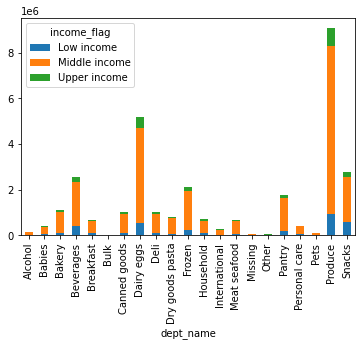

In [115]:
crosstab12_bar = crosstab12.plot(kind= 'bar', stacked = True)

In [116]:
#create crosstab for order frequency by income_flag
crosstab13 = pd.crosstab(df['income_flag'], df['frequency_flag'], dropna = False)

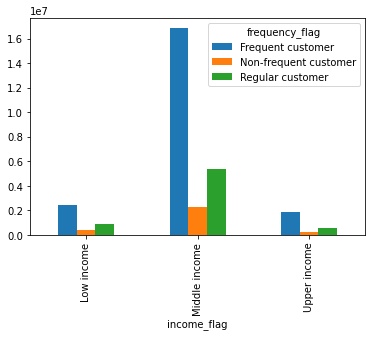

In [117]:
crosstab13_bar = crosstab13.plot(kind = 'bar', stacked = False)

In [118]:
#create crosstab for spending by income_flag
crosstab14 = pd.crosstab(df['income_flag'], df['spender_flag'], dropna = False)

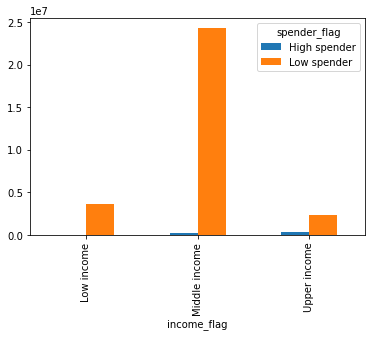

In [119]:
crosstab14_bar = crosstab14.plot(kind = 'bar', stacked = False)

In [120]:
#save viz
crosstab12_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'inc_v_dept.png'))
crosstab13_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'inc_v_freq.png'))
crosstab14_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'inc_v_spend.png'))